[E-05]RockScissorPaper_Classifier
* 목적 : 딥러닝 프레임워크를 활용하여 데이터를 학습하고 분류기를 만들어보자.
* 활용데이터 : 가위바위보 이미지 데이터
* 과정 : 각 이미지 데이터를 전처리하고, 모델을 적용하여 학습을 진행한다. 목표정확도(60%)에 도달하기 위한 실험을 해본다. 
* 목표 : 오버피팅을 극복하기 위한 시도를 해보기, test accuracy 60%이상을 달성

1. 이미지 분류기 모델이 성공적으로 만들어졌는가?
    - 학습과정이 정상적으로 수행되었으며, 학습 결과에 대한 그래프를 시각화(ex. train acc / train loss / val acc / val loss 등) 해 보았음
2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?
    - 오버피팅 극복을 위하여 데이터셋의 다양성, 정규화 등을 2가지 이상 시도해보았음
3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?
    - 60% 이상 도달하였음
---

# 0. 활용 모듈 import

In [ ]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/data_2_42/"

image_size= 28
channel_1 = 16
channel_2 = 32
dense = 50
epoch = 100

# 1. 데이터 준비

### 1-1. 데이터 Resize

In [ ]:
def image_resize(image_dir_path, image_size):
    images=glob.glob(image_dir_path + "*/*.jpg")  

    target_size=(image_size, image_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " image resize complete!")
    return len(images)

### 1-2. 데이터 Load

In [ ]:
def load_data(img_path, img_size, number_of_data):

    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("이미지 개수는 %d개 입니다." % idx)
    return imgs, labels

300  image resize complete!
이미지 개수는 300개 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)

라벨:  0


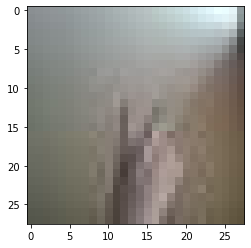

In [ ]:
# train data 불러오기
data_size = image_resize(image_dir_path, image_size)

(x_train, y_train)=load_data(image_dir_path, image_size, data_size)

x_train_norm = x_train/255.0  

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

plt.imshow(x_train[0])
print('\n라벨: ', y_train[0])

# 2. 딥러닝 네트워크 설계하기 

In [ ]:
# model 생성 
model=keras.models.Sequential()        
model.add(keras.layers.Conv2D(channel_1, (3,3), activation='relu', input_shape=(image_size, image_size,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(channel_2, (5,5), activation='relu')) 
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(dense, activation='relu'))   
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax')) 

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 32)          12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                25650     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)               

# 3. 딥러닝 네트위크 학습시키기 

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

x_train_norm=x_train_norm.reshape( -1, image_size, image_size, 3) 

history = model.fit(x_train_norm, y_train, epochs = epoch)

Epoch 1/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1043 - accuracy: 0.3567
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0957 - accuracy: 0.3467
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0777 - accuracy: 0.4433
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0626 - accuracy: 0.4800
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0507 - accuracy: 0.5033
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 1.0199 - accuracy: 0.5300
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.9561 - accuracy: 0.5967
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8942 - accuracy: 0.6433
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 0.8194 - accuracy: 0.7133
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 0.7421 - accuracy: 0.7500
Epoch 11/

# 4. 얼마나 잘 만들었는지 확인하기(테스트)

### 4-1. test 데이터 Load

300  image resize complete!
이미지 개수는 300개 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)

라벨:  0


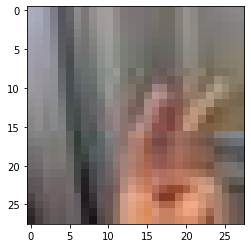

In [ ]:
# 앞에서 생성한 load_data 함수로 test data 불러오기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/"

data_size = image_resize(image_dir_path, image_size)

(x_test, y_test)=load_data(image_dir_path, image_size, data_size)

x_test_norm = x_test/255.0   

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

plt.imshow(x_test[0])
print('\n라벨: ', y_test[0])

### 4-2. 분류기 성능 테스트

In [ ]:
x_test_norm = x_test_norm.reshape( -1, image_size, image_size, 3) 

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 2s - loss: 1.1023 - accuracy: 0.7767
test_loss: 1.102266788482666 
test_accuracy: 0.7766666412353516


# 5. 학습결과 시각화

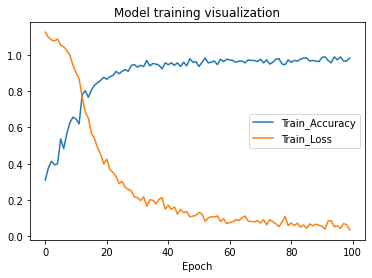

In [ ]:
plt.plot(history.history['accuracy'], label='Train_Accuracy')
plt.title('Model training visualization')
plt.xlabel('Epoch')

plt.plot(history.history['loss'], label='Train_Loss')
plt.legend()
plt.show()

# 6. 회고

    * 시도해본 것들 
- 데이터 셋 종류를 이미지 밝기와 손과의 거리 로 총 4가지로 나누어 진행
- 데이터 셋이 다양하거나 아주 많지는 않으므로, validation set 제거
- 데이터 정규화 : 오버피팅 방지
- 마지막 dense 직전 dropout : 오버피팅 방지

---

    * 실험 리포트
- 데이터 이미지의 밝기는 성능에 크게 차이가 없다 (초기 정확도 34~36 사이) 
- 데이터 자체가 성능에 영향을 주었던 것은 카메라와 손과의 거리였다. -> 이미지 resize 에서 예제와 마찬가지로 28 size를 사용하였는데, 각 픽셀에 손 영역이 차지하는 것이 많은지 여부가 성능에 영향을 준 것 같다. 
- 데이터 정규화가 성능에 영향을 크게 주었다. 
- test 결과, 모델의 layer의 구성과, kernel 사이즈 구성에 가장 영향을 많이 받았고, 모델의 복잡도가 크지 않으므로 오히려 conv 사이즈를 늘리게 되면 성능이 저하되었다. 
- 학습 추이를 시각화 해보았을 때, 약 50epoch 까지 학습이 유의미 한 것 같고, 그 이후는 train_loss 가 떨어지긴 했지만, accuracy 상승이 미미 했고, test 적용시에도 성능에 크게 영향을 주지 못했다. 이로 미루어 보아, 50~70 epoch이후는 overfitting 위험이 있는 모델이다. 
---

    * 느낀점 
- 이번 실험을 통해 간단한 CNN 모델을 통한 이미지 분류기를 만들어 보았는데, 처음에 60% 정도는 쉽게 나오겠지 ? 라는 생각이었지만, 오히려 간단한 문제의 정확도를 올릴때 더 많은 정교함이 필요하다고 생각했다. 
- 모델의 구성도 중요하지만, 데이터가 무엇이냐에 따라 영향을 많이 받았다. 하지만 데이터가 제한된 상황에서 모델구성과 파라미터 조정, 기타 테크닉을 통해 성능  향상을 위한 시도를 했던 의미있는 실험이었다. 
